# Case Base Content
 - script that uses the API to visualize the content of the case base

In [1]:
# Render our plots inline
%matplotlib inline

from requests import get
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from pandas.io.json import json_normalize

from mycbr_py_api import MyCBRRestApi as mycbr

In [19]:
server = 'localhost'
port = '8080'
base_url = 'http://' + server + ':' + port + '/'

obj = mycbr(base_url)

In [20]:
def get_instances(concept, casebase):
    raw = pd.DataFrame(requests.get(base_url + 'concepts/' + concept + '/casebases/' + casebase + '/cases').json()) 
    instances = raw.apply(pd.to_numeric, errors='coerce').fillna(raw)
    return instances

In [21]:
casebase = get_instances('Car','CaseBase0')
casebase[['caseID', 'Body', 'CCM', 'Car Code', 'Color', 'Doors',
       'Gas', 'Manufacturer', 'Miles', 'Model', 'Power', 'Price', 'Speed',
       'Year', 'ZIP']].to_csv('./data/used_cars.csv', index=False)

In [22]:
def plot_numeric_box(plot_data, attribute, title):
    if(plot_data[attribute].min()>-100):
        ax = sns.boxplot(x=plot_data[attribute])
        ax = sns.swarmplot(x=plot_data[attribute], color=".25")
        ax.set(xlabel=attribute, title=title + ' Boxplot (n='+ plot_data[[attribute]].dropna().__len__().__str__()+' (of ' + plot_data[[attribute]].__len__().__str__() +'))')
    
def plot_symbolic(plot_data, attribute, title):
    if(plot_data[attribute].isnull().sum() != plot_data.caseID.count()):
        ax = sns.countplot(x=attribute, data=plot_data, color='tab:green')
        ax.set(xlabel=attribute, ylabel='Dist', title=title + ' Distribution (n='+ plot_data[[attribute]].dropna().__len__().__str__()+' (of ' + plot_data[[attribute]].__len__().__str__() +'))')
    

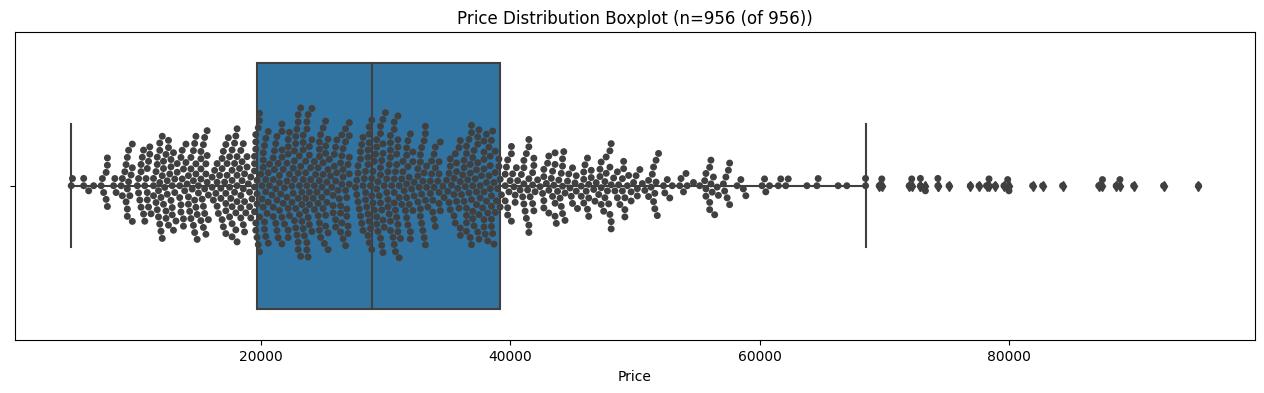

In [23]:
plt.rcParams["figure.figsize"] = (16, 4)
plot_numeric_box(casebase, 'Price', 'Price Distribution')

/opt/homebrew/Caskroom/miniforge/base/envs/py-env/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 70.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


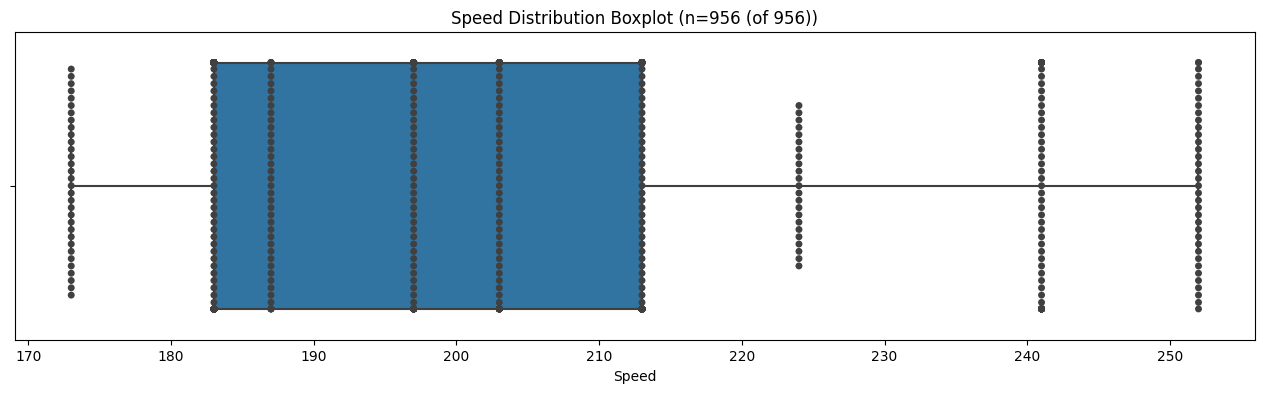

In [24]:
plt.rcParams["figure.figsize"] = (16, 4)
plot_numeric_box(casebase, 'Speed', 'Speed Distribution')

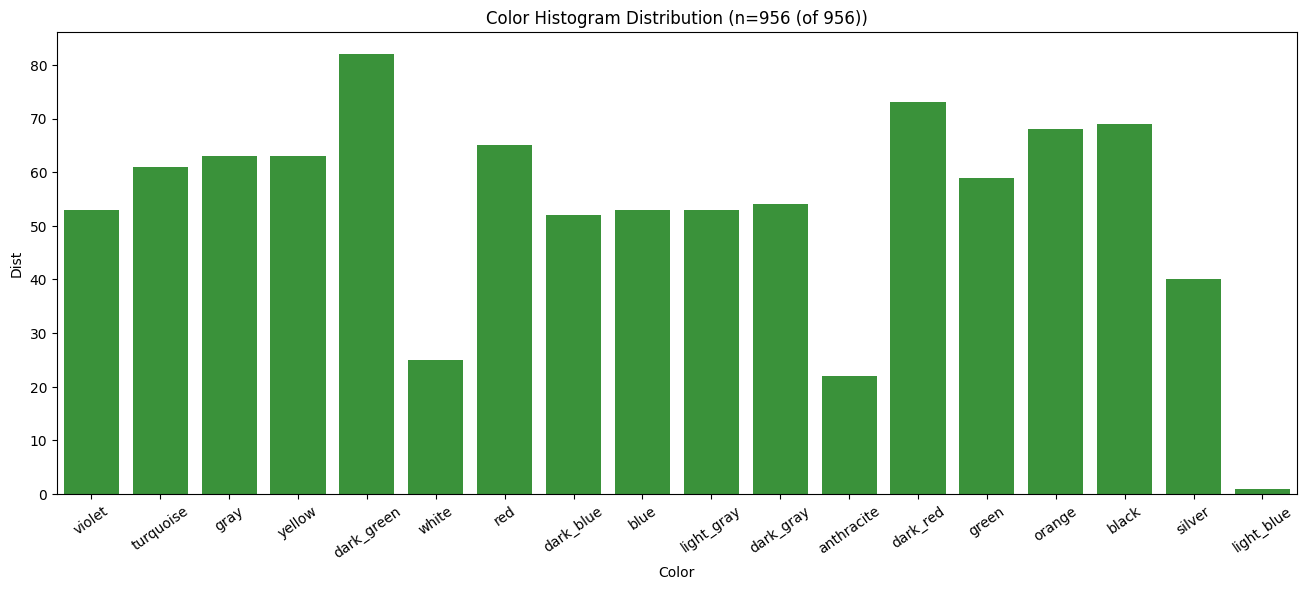

In [25]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.xticks(rotation=35)
plot_symbolic(casebase, 'Color', 'Color Histogram')

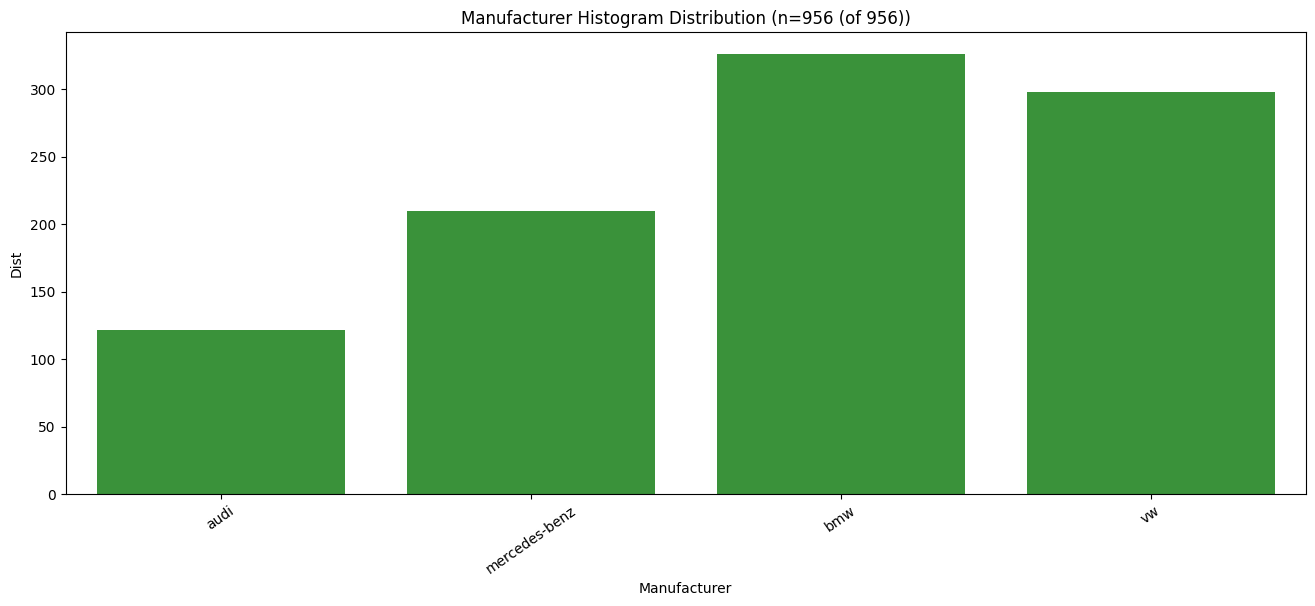

In [26]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.xticks(rotation=35)
plot_symbolic(casebase, 'Manufacturer', 'Manufacturer Histogram')

In [30]:
obj.getCaseBaseIDs()

['CaseBase0']